# Multiple Linear Regression

problem statement :


Build a machine learning model to predict profit of the company  based on different expenses for a given dataset
https://drive.google.com/open?id=1dic5dbHugytxCO6i9pcD6RPod_sLkAUA


In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

# importing one hot encoder from sklearn 
from sklearn.preprocessing import * 
  
# loading csv data from the file given in the url
data_set = pd.read_csv("50_Startups.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### data pre- processing

In [2]:
#getting top 10 records from data set
data_set.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
sc = StandardScaler()
col = ['R&D Spend', 'Administration', 'Marketing Spend','Profit']
mod_data = sc.fit_transform(data_set[col])
data_set[col] = mod_data

In [4]:
data = pd.get_dummies(data_set['State'])

In [5]:
data_set = pd.concat([data_set,data],axis=1)

In [6]:
data_set = data_set.drop(['State','R&D Spend'],axis=1)

In [7]:
data_set.head()

,Administration,Marketing Spend,Profit,California,Florida,New York
0,0.560753,2.153943,2.011203,0,0,1
1,1.082807,1.923600,1.999430,1,0,0
2,-0.728257,1.626528,1.980842,0,1,0
3,-0.096365,1.422210,1.776627,0,0,1
4,-1.079919,1.281528,1.357740,0,1,0


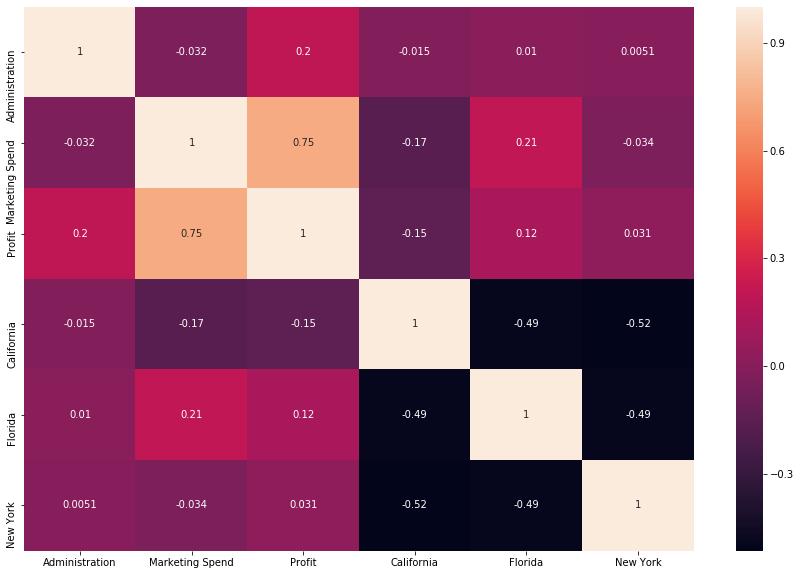

In [8]:
plt.figure(figsize=(15,10))
sea.heatmap(data_set.corr(),annot = True)

In [9]:
data_set.describe()

,Administration,Marketing Spend,Profit,California,Florida,New York
count,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000
mean,-2.564615e-16,-1.554312e-16,-5.151435e-16,0.340000,0.320000,0.340000
std,1.010153e+00,1.010153e+00,1.010153e+00,0.478518,0.471212,0.478518
min,-2.525994e+00,-1.743127e+00,-2.439313e+00,0.000000,0.000000,0.000000
25%,-6.350458e-01,-6.750713e-01,-5.481991e-01,0.000000,0.000000,0.000000
50%,4.885871e-02,1.396931e-02,-1.011113e-01,0.000000,0.000000,0.000000
75%,8.471792e-01,7.305723e-01,6.955535e-01,1.000000,1.000000,1.000000
max,2.210141e+00,2.153943e+00,2.011203e+00,1.000000,1.000000,1.000000


In [10]:
data_set.columns

Index(['Administration', 'Marketing Spend', 'Profit', 'California', 'Florida',
       'New York'],
      dtype='object')

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_set[['Administration', 'Marketing Spend', 'California', 'Florida','New York']], data_set['Profit'], train_size=0.70,test_size=0.30, random_state=101)

In [12]:
#converting each set into numpy arrays
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [13]:
#obtaining an object of linear regression class 
regressor = LinearRegression(normalize=False)  
# calling fit method to perform training
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#retrieving the intercept:
print(regressor.intercept_)
#retrieving the slope:
print(regressor.coef_)

0.07737454764874976
[ 0.25542893  0.80838812 -0.10801133  0.07912124  0.02889009]


In [15]:
#predicting the output of test data set
y_pred = regressor.predict(X_test)

In [16]:
#predicting the output of train data set
y_pred_train = regressor.predict(X_train)

In [17]:
#calculating different types of errors 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Mean Absolute Error: 0.482149186285712
Mean Squared Error: 0.5373970981622215
Root Mean Squared Error: 0.7330737331007171


In [18]:
#determining accuracy of test data sets
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

41.11538128069719 %


In [19]:
#determining accuracy of train data set
accuracy_train = regressor.score(X_train,y_train)
print(accuracy_train*100,'%')

65.52258130816233 %
